In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from patsy import dmatrices
from pandas import Series
from matplotlib import pyplot
from datetime import datetime
from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

In [2]:
champ=pd.read_csv('Champagne.csv')

In [6]:
champ.head()

,Year,Month,Sales,TimeIndex
0,1964,Jan,2815,1964-01-31
1,1964,Feb,2672,1964-02-29
2,1964,Mar,2755,1964-03-31
3,1964,Apr,2721,1964-04-30
4,1964,May,2946,1964-05-31


In [3]:
date_rng = pd.date_range(start='1/1/1964', end='30/09/1972', freq='M')

In [4]:
champ['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])

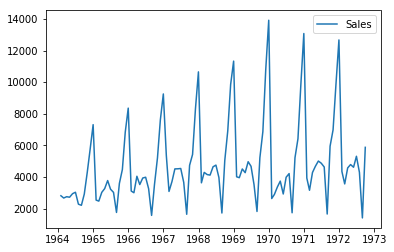

In [5]:
plt.plot(champ.TimeIndex, champ.Sales)
plt.legend(loc='best')
pyplot.show()

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [41]:
train=champ[0:int(len(champ)*0.8)] 
test=champ[int(len(champ)*0.8):]

In [19]:
train.head()

,Year,Month,Sales,TimeIndex
0,1964,Jan,2815,1964-01-31
1,1964,Feb,2672,1964-02-29
2,1964,Mar,2755,1964-03-31
3,1964,Apr,2721,1964-04-30
4,1964,May,2946,1964-05-31


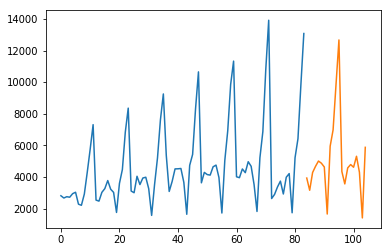

In [21]:
plt.plot(train.Sales)
plt.plot(test.Sales)
pyplot.show()

In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [115]:
model1_fit = ExponentialSmoothing(np.asarray(train['Sales']),  seasonal_periods=12, trend='add',seasonal='add').fit( smoothing_level = 0.2,smoothing_slope = 0.1, smoothing_seasonal=0.4, optimized=False)

In [116]:
fcst_HoltW = test.copy()

In [117]:
fcst_HoltW['HoltW'] = model1_fit.forecast(len(test['Sales']))

In [118]:
mean_absolute_percentage_error(test['Sales'],fcst_HoltW['HoltW'])

13.017693762759306

In [119]:
model= ExponentialSmoothing(np.asarray(champ['Sales']),  seasonal_periods=12, trend='add',seasonal='add').fit( smoothing_level = 0.2,smoothing_slope = 0.1, smoothing_seasonal=0.4, optimized=False)

In [123]:
model.forecast(24)

array([ 7041.32147583, 10105.71263245, 12734.82294978,  4007.6297375 ,
        3468.75272555,  4348.36388901,  4571.03183111,  4560.2194666 ,
        4971.10257152,  4335.16985722,  1754.63130786,  5845.90143552,
        7028.66392289, 10093.05507951, 12722.16539685,  3994.97218456,
        3456.09517262,  4335.70633607,  4558.37427818,  4547.56191367,
        4958.44501859,  4322.51230428,  1741.97375492,  5833.24388258])

In [153]:
model1_fit = ExponentialSmoothing(np.asarray(train['Sales']),  seasonal_periods=12, trend='add',seasonal='add').fit( smoothing_level = 0.09,smoothing_slope = 0.0001, smoothing_seasonal=0.35, optimized=True)
fcst_HoltW = test.copy()
fcst_HoltW['HoltW'] = model1_fit.forecast(len(test['Sales']))
mean_absolute_percentage_error(test['Sales'],fcst_HoltW['HoltW'])

11.260416399028198

In [166]:
model1_fit = ExponentialSmoothing(np.asarray(train['Sales']),  seasonal_periods=12, trend='add',seasonal='add').fit( smoothing_level = 0.09,smoothing_slope = 0.02, smoothing_seasonal=0.38, optimized=True)
fcst_HoltW = test.copy()
fcst_HoltW['HoltW'] = model1_fit.forecast(len(test['Sales']))
mean_absolute_percentage_error(test['Sales'],fcst_HoltW['HoltW'])

11.200355265326326